# Customer Analytics - Purchase Predictive Analytics
*Author: Shawn Sun*
<br>
*Date: 2021/02/27*

## Libraries

In [2]:
import numpy as np
import pandas as pd

# WTo segment our new data. We'll need scaler, pca and k-means.
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

import pickle
# Logistic Regression module for the purchase probability model.
from sklearn.linear_model import LogisticRegression 
# For visualization
import matplotlib.pyplot as plt
import matplotlib.axes as axs
import seaborn as sns
sns.set()
# Linear Regression module for the quantity model.
from sklearn.linear_model import LinearRegression

## Data Preparation

In [3]:
#load data
df_purchase = pd.read_csv('purchase data.csv')

# Import Scaler
scaler = pickle.load(open('scaler.pickle', 'rb'))
# Import PCA
pca = pickle.load(open('pca.pickle', 'rb'))
# Import K-Means
kmeans_pca = pickle.load(open('kmeans_pca.pickle', 'rb'))
# Standardization
features = df_purchase[['Sex', 'Marital status', 'Age', 'Education', 'Income', 'Occupation', 'Settlement size']]
df_purchase_segm_std = scaler.transform(features)
# Apply PCA
df_purchase_segm_pca = pca.transform(df_purchase_segm_std)
# Segment data
purchase_segm_kmeans_pca = kmeans_pca.predict(df_purchase_segm_pca)

# Create a copy of the data frame
df_purchase_predictors = df_purchase.copy()
# Add segment labels
df_purchase_predictors['Segment'] = purchase_segm_kmeans_pca
segment_dummies = pd.get_dummies(purchase_segm_kmeans_pca, prefix = 'Segment', prefix_sep = '_')
df_purchase_predictors = pd.concat([df_purchase_predictors, segment_dummies], axis = 1)

df_pa = df_purchase_predictors
df_pa.head()

ID  Day  Incidence  Brand  Quantity  Last_Inc_Brand  \
0  200000001    1          0      0         0               0   
1  200000001   11          0      0         0               0   
2  200000001   12          0      0         0               0   
3  200000001   16          0      0         0               0   
4  200000001   18          0      0         0               0   

   Last_Inc_Quantity  Price_1  Price_2  Price_3  ...  Age  Education  Income  \
0                  0     1.59     1.87     2.01  ...   47          1  110866   
1                  0     1.51     1.89     1.99  ...   47          1  110866   
2                  0     1.51     1.89     1.99  ...   47          1  110866   
3                  0     1.52     1.89     1.98  ...   47          1  110866   
4                  0     1.52     1.89     1.99  ...   47          1  110866   

   Occupation  Settlement size  Segment  Segment_0  Segment_1  Segment_2  \
0           1                0        0          1          0          0   
1           1                0        0          1          0          0   
2           1                0        0          1          0          0   
3           1                0        0          1          0          0   
4           1                0        0          1          0          0   

   Segment_3  
0          0  
1          0  
2          0  
3          0  
4          0  

[5 rows x 29 columns]

## Purchase probability model

In [4]:
# Y is Incidence, as we want to predict the purchase probability for our customers
Y = df_pa['Incidence']

In [5]:
# Dependant variable is based on the average price of chocolate candy bars. 
# X is a data frame, containing the mean across the five prices.
X = pd.DataFrame()
X['Mean_Price'] = (df_pa['Price_1'] +
                   df_pa['Price_2'] +
                   df_pa['Price_3'] +
                   df_pa['Price_4'] +
                   df_pa['Price_5'] ) / 5
X.head()

Mean_Price
0       2.044
1       2.028
2       2.028
3       2.028
4       2.030

In [6]:
# Create a Logistic Regression model
# Fit the model with our X or price and our Y or incidence
model_purchase = LogisticRegression(solver = 'sag')
model_purchase.fit(X, Y)

LogisticRegression(solver='sag')

In [7]:
# The coefficients for price
# Negative signals that with an increase in price, the purchase probability decreases.
model_purchase.coef_

array([[-2.34828067]])

## Price Elasticity of Purchase Probability

In [8]:
# The prices for the five different brands, which is an important factor in determining purchase probability. 
# It informs the price range, for which we will be exploring purchase probability.
df_pa[['Price_1', 'Price_2', 'Price_3', 'Price_4', 'Price_5']].describe()

Price_1       Price_2       Price_3       Price_4       Price_5
count  58693.000000  58693.000000  58693.000000  58693.000000  58693.000000
mean       1.392074      1.780999      2.006789      2.159945      2.654798
std        0.091139      0.170868      0.046867      0.089825      0.098272
min        1.100000      1.260000      1.870000      1.760000      2.110000
25%        1.340000      1.580000      1.970000      2.120000      2.630000
50%        1.390000      1.880000      2.010000      2.170000      2.670000
75%        1.470000      1.890000      2.060000      2.240000      2.700000
max        1.590000      1.900000      2.140000      2.260000      2.800000

In [9]:
# Price range for which we'll examine the purchase probability.
# Choose a price range between 0.5 and 3.49, 
#  which somewhat expands the actual observed price range, 
#  which is from 1.1 to 2.8. 
price_range = np.arange(0.5, 3.5, 0.01)
price_range

array([0.5 , 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6 ,
       0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67, 0.68, 0.69, 0.7 , 0.71,
       0.72, 0.73, 0.74, 0.75, 0.76, 0.77, 0.78, 0.79, 0.8 , 0.81, 0.82,
       0.83, 0.84, 0.85, 0.86, 0.87, 0.88, 0.89, 0.9 , 0.91, 0.92, 0.93,
       0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1.  , 1.01, 1.02, 1.03, 1.04,
       1.05, 1.06, 1.07, 1.08, 1.09, 1.1 , 1.11, 1.12, 1.13, 1.14, 1.15,
       1.16, 1.17, 1.18, 1.19, 1.2 , 1.21, 1.22, 1.23, 1.24, 1.25, 1.26,
       1.27, 1.28, 1.29, 1.3 , 1.31, 1.32, 1.33, 1.34, 1.35, 1.36, 1.37,
       1.38, 1.39, 1.4 , 1.41, 1.42, 1.43, 1.44, 1.45, 1.46, 1.47, 1.48,
       1.49, 1.5 , 1.51, 1.52, 1.53, 1.54, 1.55, 1.56, 1.57, 1.58, 1.59,
       1.6 , 1.61, 1.62, 1.63, 1.64, 1.65, 1.66, 1.67, 1.68, 1.69, 1.7 ,
       1.71, 1.72, 1.73, 1.74, 1.75, 1.76, 1.77, 1.78, 1.79, 1.8 , 1.81,
       1.82, 1.83, 1.84, 1.85, 1.86, 1.87, 1.88, 1.89, 1.9 , 1.91, 1.92,
       1.93, 1.94, 1.95, 1.96, 1.97, 1.98, 1.99, 2.

In [10]:
df_price_range = pd.DataFrame(price_range)

In [11]:
# Predict the purchase probability for our newly defined price range. 
# The result is a 2x300  array. 
# The first column shows the probability for not purchasing the product, 
# the second the probability for purchase for each price point in our price range.
Y_pr = model_purchase.predict_proba(df_price_range)
purchase_pr = Y_pr[:][:, 1]

# Elasticity = beta*price*(1-P(purchase))
pe = model_purchase.coef_[:, 0] * price_range * (1 - purchase_pr)

In [12]:
# Create price elasticities master data frame
df_price_elasticities = pd.DataFrame(price_range)
df_price_elasticities.head()

0
0  0.50
1  0.51
2  0.52
3  0.53
4  0.54

In [13]:
df_price_elasticities = df_price_elasticities.rename(columns = {0: "Price_Point"})
df_price_elasticities['Mean_PE'] = pe
df_price_elasticities

Price_Point   Mean_PE
0           0.50 -0.096436
1           0.51 -0.100506
2           0.52 -0.104703
3           0.53 -0.109030
4           0.54 -0.113491
..           ...       ...
295         3.45 -8.013757
296         3.46 -8.039007
297         3.47 -8.064224
298         3.48 -8.089406
299         3.49 -8.114555

[300 rows x 2 columns]

Text(0.5, 1.0, 'Price Elasticity of Purchase Probability')

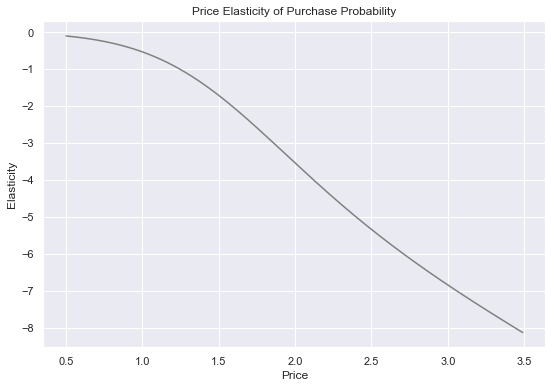

In [14]:
# Display the price elasticity of purchase probability of the average customer.
# Price elasticities are all negative. 
# Furthermore we can spot where the customer becomes inelastic when |e|=1

plt.figure(figsize = (9, 6))
plt.plot(price_range, pe, color = 'grey')
plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.title('Price Elasticity of Purchase Probability')

#### Insights:
- With prices lower than 1.25, we can increase our product price without losing too much in terms of purchase probability. <br>
- For prices higher than 1.25, We have more to gain by reducing our prices.

## Purchase Probability by Segments

### $\color{green}{\text{Segment 1 - Career-Focused}}$

In [15]:
# Filter the data to contain only customers from segment 1, the career-focused.
df_pa_segment_1 = df_pa[df_pa['Segment'] == 1]

# Y variable is the incidence column
Y = df_pa_segment_1['Incidence']

X = pd.DataFrame()

# Calculate the average price for purchases in segment 1. 
# Dependant variable contains the mean price of the brands.
X['Mean_Price'] = (df_pa_segment_1['Price_1'] + 
                   df_pa_segment_1['Price_2'] + 
                   df_pa_segment_1['Price_3'] + 
                   df_pa_segment_1['Price_4'] + 
                   df_pa_segment_1['Price_5']) / 5

In [16]:
# Fit logistic regression model
model_incidence_segment_1 = LogisticRegression(solver = 'sag')
model_incidence_segment_1.fit(X, Y)

LogisticRegression(solver='sag')

In [17]:
# The price coefficient for the career focused is -1.7, 
#   whereas for the average customer it was -2.35.
# Note: this segment is less price sensitive compared to the average customer.
model_incidence_segment_1.coef_

array([[-1.72177834]])

In [18]:
# Calculate Price Elasticity of the career-focused segment.
Y_segment_1 = model_incidence_segment_1.predict_proba(df_price_range)
purchase_pr_segment_1 = Y_segment_1[:][:, 1]
pe_segment_1 = model_incidence_segment_1.coef_[:, 0] * price_range * (1 - purchase_pr_segment_1)

### Results

In [19]:
df_price_elasticities['PE_Segment_1'] = pe_segment_1
df_price_elasticities

Price_Point   Mean_PE  PE_Segment_1
0           0.50 -0.096436     -0.118478
1           0.51 -0.100506     -0.122653
2           0.52 -0.104703     -0.126922
3           0.53 -0.109030     -0.131286
4           0.54 -0.113491     -0.135747
..           ...       ...           ...
295         3.45 -8.013757     -5.717139
296         3.46 -8.039007     -5.737387
297         3.47 -8.064224     -5.757598
298         3.48 -8.089406     -5.777772
299         3.49 -8.114555     -5.797910

[300 rows x 3 columns]

Text(0.5, 1.0, 'Price Elasticity of Purchase Probability')

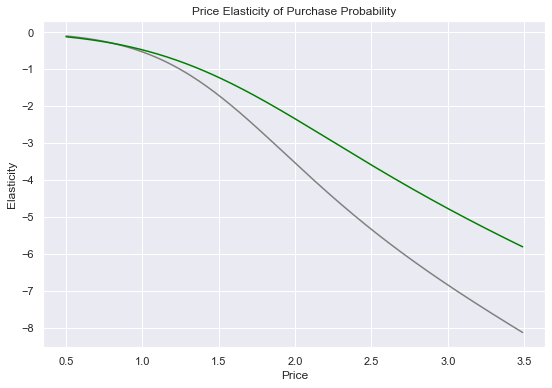

In [20]:
# Plot the elasticities of the average customer and the career-focused segment side by side. 
# The career-focused segment is displayed in green. 

plt.figure(figsize = (9, 6))
plt.plot(price_range, pe, color = 'grey')
plt.plot(price_range, pe_segment_1, color = 'green')
plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.title('Price Elasticity of Purchase Probability')

### $\color{red}{\text{Segment 2 - Fewer-Opportunities}}$

In [21]:
# Select only customers from segment 2, the fewer-opportunities.
df_pa_segment_2 = df_pa[df_pa['Segment'] == 2]

In [22]:
# Logistic regression model
Y = df_pa_segment_2['Incidence']

X = pd.DataFrame()
# Calculate average price for this segment
X['Mean_Price'] = (df_pa_segment_2['Price_1'] + 
                   df_pa_segment_2['Price_2'] + 
                   df_pa_segment_2['Price_3'] + 
                   df_pa_segment_2['Price_4'] + 
                   df_pa_segment_2['Price_5']) / 5

model_incidence_segment2 = LogisticRegression(solver = 'sag')
model_incidence_segment2.fit(X, Y)

# Calculate price elasticities
model_incidence_segment2.coef_
Y_segment_2 = model_incidence_segment2.predict_proba(df_price_range)
purchase_pr_segment2 = Y_segment_2[:][: , 1]
pe_segment2 = model_incidence_segment2.coef_[:,0] * price_range * ( 1- purchase_pr_segment2)

### Results

In [23]:
df_price_elasticities['PE_Segment_2'] = pe_segment2

Text(0.5, 1.0, 'Price Elasticity of Purchase Probability')

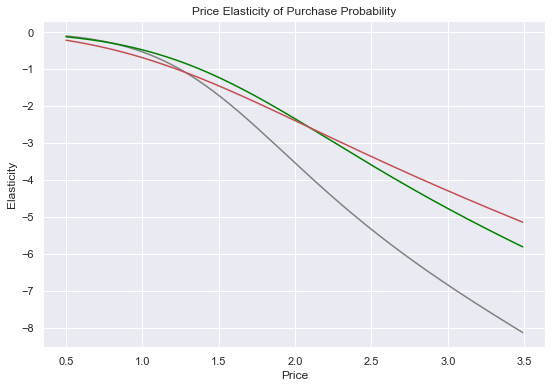

In [24]:
plt.figure(figsize = (9, 6))
plt.plot(price_range, pe, color = 'grey')
plt.plot(price_range, pe_segment_1, color = 'green')
plt.plot(price_range, pe_segment2, color = 'r')
plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.title('Price Elasticity of Purchase Probability')

### $\color{blue}{\text{Segment 0 - Standard}}$

In [25]:
# Select only customers from segment 0, the standard segment.
df_pa_segment_0 = df_pa[df_pa['Segment'] == 0]
# Prepare dependant and independant variables.
Y = df_pa_segment_0['Incidence']

X = pd.DataFrame()
# Calculate average price for this segment
X['Mean_Price'] = (df_pa_segment_0['Price_1'] + 
                   df_pa_segment_0['Price_2'] + 
                   df_pa_segment_0['Price_3'] + 
                   df_pa_segment_0['Price_4'] + 
                   df_pa_segment_0['Price_5']) / 5
# Logistic regression model
model_incidence_segment0 = LogisticRegression(solver = 'sag')
model_incidence_segment0.fit(X, Y)

model_incidence_segment0.coef_
Y_segment_0 = model_incidence_segment0.predict_proba(df_price_range)
purchase_pr_segment0 = Y_segment_0[:][: , 1]
pe_segment0 = model_incidence_segment0.coef_[:,0] * price_range *( 1- purchase_pr_segment0)
df_price_elasticities.insert(2, column = 'PE_Segment_0', value = pe_segment0)

### $\color{orange}{\text{Segment 3 - Well-Off}}$

In [26]:
# Select only customers from segment 3 
df_pa_segment_3 = df_pa[df_pa['Segment'] == 3]
# Prepare dependant and independant variables.
Y = df_pa_segment_3['Incidence']

X = pd.DataFrame()
# Calculate average price for this segment
X['Mean_Price'] = (df_pa_segment_3['Price_1'] + 
                   df_pa_segment_3['Price_2'] + 
                   df_pa_segment_3['Price_3'] + 
                   df_pa_segment_3['Price_4'] + 
                   df_pa_segment_3['Price_5']) / 5
# Logistic regression model
model_incidence_segment3 = LogisticRegression(solver = 'sag')
model_incidence_segment3.fit(X, Y)

model_incidence_segment3.coef_
Y_segment_3 = model_incidence_segment2.predict_proba(df_price_range)
purchase_pr_segment3 = Y_segment_3[:][: , 1]
pe_segment3 = model_incidence_segment3.coef_[:,0] * price_range *( 1- purchase_pr_segment3)
df_price_elasticities['PE_Segment_3'] = pe_segment3

### Results

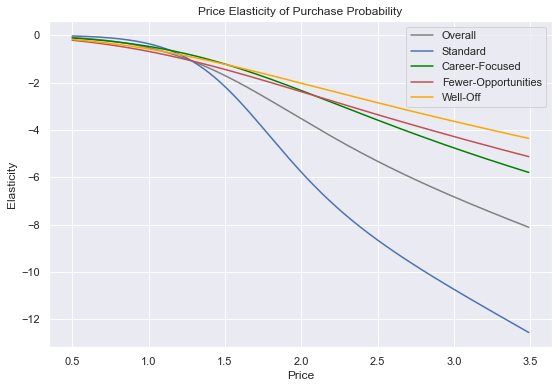

In [27]:
# Display all elasticities of purchase probability on the same plot. 

plt.figure(figsize = (9, 6))
plt.plot(price_range, pe, color = 'grey')
plt.plot(price_range, pe_segment0, color = 'b')
plt.plot(price_range, pe_segment_1, color = 'green')
plt.plot(price_range, pe_segment2, color = 'r')
plt.plot(price_range, pe_segment3, color = 'orange')
plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.title('Price Elasticity of Purchase Probability')
plt.legend(['Overall','Standard','Career-Focused',
            'Fewer-Opportunities','Well-Off'])

#### Insights:
- The Career-focused segment are the least elastic when compared to the rest. <br>
So, their purchase probability elasticity is not as affected by price.
- The price elasticities for the Standard segment seem to differ across price range. <br>
This may be due to the fact that the standard segment is least homogenous, which we discovered during our descriptive analysis. <br>
It may be that the customers in this segment have different shopping habbits, which is why their customers start with being more elastic than average but then shift to being more inelastic than the average customer and indeed the Career-focused segment.

## Purchase Probability with Promotion Feature

### Data Preparation

In [28]:
Y = df_pa['Incidence']

X = pd.DataFrame()
X['Mean_Price'] = (df_pa['Price_1'] + 
                   df_pa['Price_2'] + 
                   df_pa['Price_3'] + 
                   df_pa['Price_4'] + 
                   df_pa['Price_5']) / 5

# Include a second promotion feature. 
#  To xamine the effects of promotions on purchase probability.
# Calculate the average promotion rate across the five brands. 
#  Add the mean price for the brands.
X['Mean_Promotion'] = (df_pa['Promotion_1'] +
                       df_pa['Promotion_2'] +
                       df_pa['Promotion_3'] +
                       df_pa['Promotion_4'] +
                       df_pa['Promotion_5'] ) / 5
X.head()

Mean_Price  Mean_Promotion
0       2.044             0.2
1       2.028             0.0
2       2.028             0.0
3       2.028             0.0
4       2.030             0.0

## Model Estimation

In [29]:
# The coefficient for promotion is positive. 
# There is a positive relationship between promotion and purchase probability.
model_incidence_promotion = LogisticRegression(solver = 'sag')
model_incidence_promotion.fit(X, Y)
model_incidence_promotion.coef_

array([[-1.4938721 ,  0.56148815]])

## Price Elasticity with Promotion

In [30]:
# Create a data frame on which our model will predict. 
# Include a price and promotion feature.
# Include the price range as the price feature. 
# Include the promotion feature.
df_price_elasticity_promotion = pd.DataFrame(price_range)
df_price_elasticity_promotion = \
df_price_elasticity_promotion.rename(columns = {0: "Price_Range"})

In [31]:
# Calculate price elasticities of purchase probability 
#   when we assume there is a promotion across at each price points.
df_price_elasticity_promotion['Promotion'] = 1
df_price_elasticity_promotion

Price_Range  Promotion
0           0.50          1
1           0.51          1
2           0.52          1
3           0.53          1
4           0.54          1
..           ...        ...
295         3.45          1
296         3.46          1
297         3.47          1
298         3.48          1
299         3.49          1

[300 rows x 2 columns]

In [32]:
# Purchase Probability with Promotion Model Prediction
Y_promotion = model_incidence_promotion.predict_proba(df_price_elasticity_promotion)

In [33]:
promo = Y_promotion[:, 1]

#Elasticity
price_elasticity_promo = \
(model_incidence_promotion.coef_[:, 0] * price_range) * (1 - promo)

In [34]:
# Update master data to include elasticities of purchase probability 
#  with promotion feature
df_price_elasticities['Elasticity_Promotion_1'] = price_elasticity_promo
df_price_elasticities

Price_Point   Mean_PE  PE_Segment_0  PE_Segment_1  PE_Segment_2  \
0           0.50 -0.096436     -0.032318     -0.118478     -0.211213   
1           0.51 -0.100506     -0.034151     -0.122653     -0.217792   
2           0.52 -0.104703     -0.036073     -0.126922     -0.224479   
3           0.53 -0.109030     -0.038089     -0.131286     -0.231275   
4           0.54 -0.113491     -0.040202     -0.135747     -0.238180   
..           ...       ...           ...           ...           ...   
295         3.45 -8.013757    -12.414354     -5.717139     -5.064079   
296         3.46 -8.039007    -12.450920     -5.737387     -5.080966   
297         3.47 -8.064224    -12.487470     -5.757598     -5.097834   
298         3.48 -8.089406    -12.524002     -5.777772     -5.114684   
299         3.49 -8.114555    -12.560519     -5.797910     -5.131515   

     PE_Segment_3  Elasticity_Promotion_1  
0       -0.179446               -0.125736  
1       -0.185035               -0.129852  
2       -0.190716               -0.134047  
3       -0.196490               -0.138322  
4       -0.202356               -0.142678  
..            ...                     ...  
295     -4.302414               -4.861040  
296     -4.316761               -4.879240  
297     -4.331092               -4.897410  
298     -4.345408               -4.915550  
299     -4.359707               -4.933659  

[300 rows x 7 columns]

## Price Elasticity without Promotion

In [35]:
df_price_elasticity_promotion_no = pd.DataFrame(price_range)
df_price_elasticity_promotion_no = \
df_price_elasticity_promotion_no.rename(columns = {0: "Price_Range"})

# Promotion feature -No Promotion.
# Assume there aren't any promotional activities on any of the price points.
# Examine the elasticity of purchase probability when there isn't promotion.
# Note: when the variables are 0 for 'Promotion', 
#   the model results won't include the impact of that variable
df_price_elasticity_promotion_no['Promotion'] = 0

# Purchase Probability without Promotion Model Prediction
Y_no_promo = \
model_incidence_promotion.predict_proba(df_price_elasticity_promotion_no)

no_promo = Y_no_promo[: , 1]

#Elasticity
price_elasticity_no_promo = model_incidence_promotion.coef_[:, 0] * price_range *(1- no_promo)

In [36]:
# Update master data frame to include purchase probability elasticities without promotion.
# Values with and without promotion and 
#   compare them for each price point in our price range.
df_price_elasticities['Elasticity_Promotion_0'] = price_elasticity_no_promo
df_price_elasticities

Price_Point   Mean_PE  PE_Segment_0  PE_Segment_1  PE_Segment_2  \
0           0.50 -0.096436     -0.032318     -0.118478     -0.211213   
1           0.51 -0.100506     -0.034151     -0.122653     -0.217792   
2           0.52 -0.104703     -0.036073     -0.126922     -0.224479   
3           0.53 -0.109030     -0.038089     -0.131286     -0.231275   
4           0.54 -0.113491     -0.040202     -0.135747     -0.238180   
..           ...       ...           ...           ...           ...   
295         3.45 -8.013757    -12.414354     -5.717139     -5.064079   
296         3.46 -8.039007    -12.450920     -5.737387     -5.080966   
297         3.47 -8.064224    -12.487470     -5.757598     -5.097834   
298         3.48 -8.089406    -12.524002     -5.777772     -5.114684   
299         3.49 -8.114555    -12.560519     -5.797910     -5.131515   

     PE_Segment_3  Elasticity_Promotion_1  Elasticity_Promotion_0  
0       -0.179446               -0.125736               -0.195642  
1       -0.185035               -0.129852               -0.201763  
2       -0.190716               -0.134047               -0.207986  
3       -0.196490               -0.138322               -0.214313  
4       -0.202356               -0.142678               -0.220744  
..            ...                     ...                     ...  
295     -4.302414               -4.861040               -4.982668  
296     -4.316761               -4.879240               -4.999573  
297     -4.331092               -4.897410               -5.016458  
298     -4.345408               -4.915550               -5.033323  
299     -4.359707               -4.933659               -5.050168  

[300 rows x 8 columns]

Text(0.5, 1.0, 'Price Elasticity of Purchase Probability with and without Promotion')

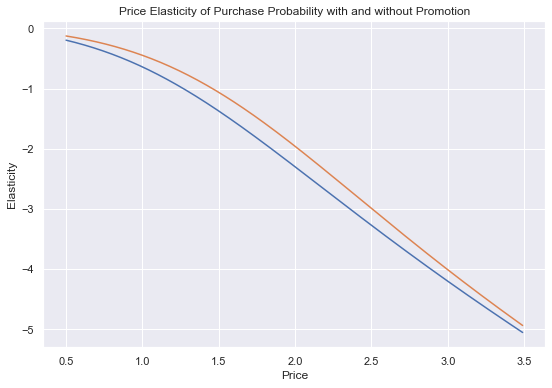

In [37]:
# Plot purchase elasticities with and without promotion side by side for comprarisson.

plt.figure(figsize = (9, 6))
plt.plot(price_range, price_elasticity_no_promo)
plt.plot(price_range, price_elasticity_promo)
plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.title('Price Elasticity of Purchase Probability with and without Promotion')

#### Insights:
- The purchase probability elasticity of the customer is less elastic when there is promotion.
- This is an important insight for marketers, as according to our model people are more likely to buy a product if there is some promotional activity rather than purchase a product with the same price, when it isn't on promotion. 

## Brand Choice

### Data preparation

In [38]:
# To determine the brand choice of the customer. 
# Filter our data, include only purchase occasion 
brand_choice = df_pa[df_pa['Incidence'] == 1]
brand_choice

ID  Day  Incidence  Brand  Quantity  Last_Inc_Brand  \
6      200000001   28          1      2         2               0   
11     200000001   58          1      5         1               0   
19     200000001  110          1      1         2               0   
24     200000001  142          1      4         1               0   
29     200000001  183          1      2         3               0   
...          ...  ...        ...    ...       ...             ...   
58621  200000500  296          1      2         6               0   
58648  200000500  460          1      1        12               0   
58674  200000500  641          1      2         7               0   
58687  200000500  697          1      2         6               0   
58691  200000500  722          1      2         3               0   

       Last_Inc_Quantity  Price_1  Price_2  Price_3  ...  Age  Education  \
6                      0     1.50     1.90     1.99  ...   47          1   
11                     0     1.39     1.90     1.91  ...   47          1   
19                     0     1.47     1.90     1.99  ...   47          1   
24                     0     1.21     1.35     1.99  ...   47          1   
29                     0     1.46     1.88     1.97  ...   47          1   
...                  ...      ...      ...      ...  ...  ...        ...   
58621                  0     1.48     1.89     2.01  ...   42          1   
58648                  0     1.35     1.57     2.02  ...   42          1   
58674                  0     1.50     1.85     2.06  ...   42          1   
58687                  0     1.42     1.51     1.97  ...   42          1   
58691                  0     1.51     1.82     2.09  ...   42          1   

       Income  Occupation  Settlement size  Segment  Segment_0  Segment_1  \
6      110866           1                0        0          1          0   
11     110866           1                0        0          1          0   
19     110866           1                0        0          1          0   
24     110866           1                0        0          1          0   
29     110866           1                0        0          1          0   
...       ...         ...              ...      ...        ...        ...   
58621  120946           1                0        0          1          0   
58648  120946           1                0        0          1          0   
58674  120946           1                0        0          1          0   
58687  120946           1                0        0          1          0   
58691  120946           1                0        0          1          0   

       Segment_2  Segment_3  
6              0          0  
11             0          0  
19             0          0  
24             0          0  
29             0          0  
...          ...        ...  
58621          0          0  
58648          0          0  
58674          0          0  
58687          0          0  
58691          0          0  

[14638 rows x 29 columns]

In [39]:
# Set the dependent variable
Y = brand_choice['Brand']

In [40]:
# Check and decide which features to include for prediction.
brand_choice.columns.values

array(['ID', 'Day', 'Incidence', 'Brand', 'Quantity', 'Last_Inc_Brand',
       'Last_Inc_Quantity', 'Price_1', 'Price_2', 'Price_3', 'Price_4',
       'Price_5', 'Promotion_1', 'Promotion_2', 'Promotion_3',
       'Promotion_4', 'Promotion_5', 'Sex', 'Marital status', 'Age',
       'Education', 'Income', 'Occupation', 'Settlement size', 'Segment',
       'Segment_0', 'Segment_1', 'Segment_2', 'Segment_3'], dtype=object)

In [41]:
# Predict based on the prices for the five brands.
features = ['Price_1', 'Price_2', 'Price_3', 'Price_4', 'Price_5']
X = brand_choice[features]

In [43]:
# Brand Choice Model fit.
model_brand_choice = LogisticRegression(solver = 'sag', 
                                        multi_class = 'multinomial')
model_brand_choice.fit(X, Y)

LogisticRegression(multi_class='multinomial', solver='sag')

In [44]:
# Create a pandas data frame, which contains to coefficients
#  to be reader-friendly
bc_coef = pd.DataFrame(model_brand_choice.coef_)
bc_coef

0         1         2         3         4
0 -3.915951  0.658464  2.417745  0.704090 -0.202100
1  1.274618 -1.879853 -0.212625 -0.206338  0.587876
2  1.624163  0.562099  0.500793  1.039492  0.452758
3  0.574544  0.395590 -1.400582 -1.246240  0.249358
4  0.442625  0.263700 -1.305331 -0.291004 -1.087894

In [45]:
# To increase readability:
#  transpose the data frame, to keep with the conventional representation of results.
#  add labels for the columns and the index, which represent the coefficients of the brands and prices, respectively. 
bc_coef = pd.DataFrame(np.transpose(model_brand_choice.coef_))
coefficients = ['Coef_Brand_1', 'Coef_Brand_2', 'Coef_Brand_3', 'Coef_Brand_4', 'Coef_Brand_5']
bc_coef.columns = [coefficients]
prices = ['Price_1', 'Price_2', 'Price_3', 'Price_4', 'Price_5']
bc_coef.index = [prices]
bc_coef = bc_coef.round(2)
bc_coef

Coef_Brand_1 Coef_Brand_2 Coef_Brand_3 Coef_Brand_4 Coef_Brand_5
Price_1        -3.92         1.27         1.62         0.57         0.44
Price_2         0.66        -1.88         0.56         0.40         0.26
Price_3         2.42        -0.21         0.50        -1.40        -1.31
Price_4         0.70        -0.21         1.04        -1.25        -0.29
Price_5        -0.20         0.59         0.45         0.25        -1.09

## Own Price Elasticity Brand 5

In [46]:
# To calculate price elasticity of brand choice
# Create a data frame with price columns, 
#  which our model will use to predict the brand choice probabilities.
df_own_brand_5 = pd.DataFrame(index = np.arange(price_range.size))
df_own_brand_5['Price_1'] = brand_choice['Price_1'].mean()
df_own_brand_5['Price_2'] = brand_choice['Price_2'].mean()
df_own_brand_5['Price_3'] = brand_choice['Price_3'].mean()
df_own_brand_5['Price_4'] = brand_choice['Price_4'].mean()
df_own_brand_5['Price_5'] = price_range
df_own_brand_5

Price_1   Price_2   Price_3   Price_4  Price_5
0    1.384559  1.764717  2.006694  2.159658     0.50
1    1.384559  1.764717  2.006694  2.159658     0.51
2    1.384559  1.764717  2.006694  2.159658     0.52
3    1.384559  1.764717  2.006694  2.159658     0.53
4    1.384559  1.764717  2.006694  2.159658     0.54
..        ...       ...       ...       ...      ...
295  1.384559  1.764717  2.006694  2.159658     3.45
296  1.384559  1.764717  2.006694  2.159658     3.46
297  1.384559  1.764717  2.006694  2.159658     3.47
298  1.384559  1.764717  2.006694  2.159658     3.48
299  1.384559  1.764717  2.006694  2.159658     3.49

[300 rows x 5 columns]

In [51]:
# Brand Choice Model prediction
predict_brand_5 = model_brand_choice.predict_proba(df_own_brand_5)
predict_brand_5

array([[0.03290663, 0.02177646, 0.00543867, 0.029888  , 0.90999024],
       [0.03316135, 0.02211908, 0.00551678, 0.03025564, 0.90894715],
       [0.03341757, 0.02246677, 0.00559593, 0.03062737, 0.90789236],
       ...,
       [0.06881418, 0.47570358, 0.07953514, 0.23889489, 0.13705221],
       [0.06852857, 0.47748639, 0.07972542, 0.23897984, 0.13527977],
       [0.06824202, 0.4792609 , 0.07991366, 0.23905735, 0.13352607]])

In [53]:
# Model returns the probabilities of choosing each of the 5 brands. 
# Only interested in the probability for the fifth brand
pr_own_brand_5 = predict_brand_5[: ][:, 4]

In [54]:
# Choosing brand 5. 
# Get brand 5 coefficient and price 5
beta5 = bc_coef.iloc[4, 4]
beta5

-1.09

In [55]:
# Calculating price elasticities for brand choice without promotion. 
own_price_elasticity_brand_5 = beta5 * price_range * (1 - pr_own_brand_5)

In [61]:
df_price_elasticities['Brand_5'] = own_price_elasticity_brand_5
pd.options.display.max_rows = None
df_price_elasticities

Price_Point   Mean_PE  PE_Segment_0  PE_Segment_1  PE_Segment_2  \
0           0.50 -0.096436     -0.032318     -0.118478     -0.211213   
1           0.51 -0.100506     -0.034151     -0.122653     -0.217792   
2           0.52 -0.104703     -0.036073     -0.126922     -0.224479   
3           0.53 -0.109030     -0.038089     -0.131286     -0.231275   
4           0.54 -0.113491     -0.040202     -0.135747     -0.238180   
5           0.55 -0.118088     -0.042417     -0.140306     -0.245196   
6           0.56 -0.122825     -0.044737     -0.144965     -0.252323   
7           0.57 -0.127705     -0.047168     -0.149726     -0.259562   
8           0.58 -0.132732     -0.049715     -0.154589     -0.266914   
9           0.59 -0.137910     -0.052382     -0.159556     -0.274380   
10          0.60 -0.143241     -0.055174     -0.164629     -0.281959   
11          0.61 -0.148729     -0.058097     -0.169810     -0.289653   
12          0.62 -0.154378     -0.061157     -0.175099     -0.297462   
13          0.63 -0.160192     -0.064358     -0.180499     -0.305387   
14          0.64 -0.166174     -0.067708     -0.186011     -0.313429   
15          0.65 -0.172327     -0.071212     -0.191637     -0.321588   
16          0.66 -0.178657     -0.074877     -0.197377     -0.329865   
17          0.67 -0.185166     -0.078710     -0.203235     -0.338260   
18          0.68 -0.191859     -0.082716     -0.209210     -0.346773   
19          0.69 -0.198738     -0.086904     -0.215305     -0.355406   
20          0.70 -0.205810     -0.091281     -0.221522     -0.364159   
21          0.71 -0.213076     -0.095855     -0.227861     -0.373031   
22          0.72 -0.220541     -0.100633     -0.234325     -0.382025   
23          0.73 -0.228210     -0.105624     -0.240915     -0.391139   
24          0.74 -0.236086     -0.110836     -0.247632     -0.400375   
25          0.75 -0.244174     -0.116277     -0.254478     -0.409732   
26          0.76 -0.252477     -0.121958     -0.261455     -0.419211   
27          0.77 -0.260999     -0.127887     -0.268563     -0.428813   
28          0.78 -0.269746     -0.134074     -0.275806     -0.438538   
29          0.79 -0.278720     -0.140529     -0.283183     -0.448385   
30          0.80 -0.287927     -0.147262     -0.290697     -0.458355   
31          0.81 -0.297370     -0.154284     -0.298348     -0.468449   
32          0.82 -0.307054     -0.161606     -0.306140     -0.478666   
33          0.83 -0.316982     -0.169238     -0.314072     -0.489007   
34          0.84 -0.327159     -0.177193     -0.322147     -0.499471   
35          0.85 -0.337590     -0.185483     -0.330365     -0.510060   
36          0.86 -0.348278     -0.194119     -0.338729     -0.520772   
37          0.87 -0.359227     -0.203114     -0.347239     -0.531608   
38          0.88 -0.370442     -0.212481     -0.355897     -0.542568   
39          0.89 -0.381927     -0.222233     -0.364705     -0.553652   
40          0.90 -0.393685     -0.232384     -0.373663     -0.564860   
41          0.91 -0.405722     -0.242948     -0.382773     -0.576191   
42          0.92 -0.418041     -0.253939     -0.392037     -0.587646   
43          0.93 -0.430646     -0.265371     -0.401455     -0.599225   
44          0.94 -0.443541     -0.277259     -0.411029     -0.610927   
45          0.95 -0.456729     -0.289620     -0.420760     -0.622753   
46          0.96 -0.470216     -0.302467     -0.430650     -0.634701   
47          0.97 -0.484005     -0.315817     -0.440698     -0.646772   
48          0.98 -0.498098     -0.329686     -0.450908     -0.658965   
49          0.99 -0.512501     -0.344090     -0.461279     -0.671280   
50          1.00 -0.527217     -0.359047     -0.471813     -0.683717   
51          1.01 -0.542249     -0.374573     -0.482510     -0.696276   
52          1.02 -0.557600     -0.390685     -0.493373     -0.708955   
53          1.03 -0.573275     -0.407400     -0.504401     -0.721755   
54          1.04 -0.589276     -0.424737     

In [67]:
pd.options.display.max_rows = 30

Text(0.5, 1.0, 'Own Price Elasticity of Purchase Probability for Brand 5')

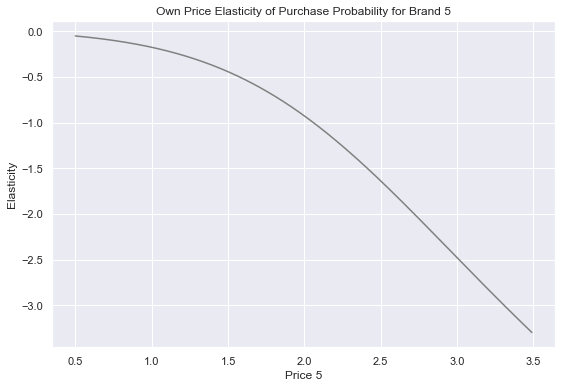

In [62]:
# Plot elasticities of purchase probability for brand 5.
plt.figure(figsize = (9, 6))
plt.plot(price_range, own_price_elasticity_brand_5, color = 'grey')
plt.xlabel('Price 5')
plt.ylabel('Elasticity')
plt.title('Own Price Elasticity of Purchase Probability for Brand 5')

## Cross Price Elasticity Brand 5, Cross Brand 4

In [63]:
# To examine the effect of the changes in price of a competitor brand.
# The brand which comes closest to brand 5 is brand 4. 
# - Need to examine changes in the price of this brand.
df_brand5_cross_brand4 = pd.DataFrame(index = np.arange(price_range.size))
df_brand5_cross_brand4['Price_1'] = brand_choice['Price_1'].mean()
df_brand5_cross_brand4['Price_2'] = brand_choice['Price_2'].mean()
df_brand5_cross_brand4['Price_3'] = brand_choice['Price_3'].mean()
df_brand5_cross_brand4['Price_4'] = price_range
df_brand5_cross_brand4['Price_5'] = brand_choice['Price_5'].mean()

In [64]:
df_brand5_cross_brand4.head()

Price_1   Price_2   Price_3  Price_4   Price_5
0  1.384559  1.764717  2.006694     0.50  2.654296
1  1.384559  1.764717  2.006694     0.51  2.654296
2  1.384559  1.764717  2.006694     0.52  2.654296
3  1.384559  1.764717  2.006694     0.53  2.654296
4  1.384559  1.764717  2.006694     0.54  2.654296

In [66]:
predict_brand5_cross_brand4 = model_brand_choice.predict_proba(df_brand5_cross_brand4)
pr_brand_4 = predict_brand5_cross_brand4[:][:, 3]

In [ ]:
beta5

In [68]:
# To calculate the cross brand price elasticity (with new formula)
brand5_cross_brand4_price_elasticity = -beta5 * price_range * pr_brand_4

df_price_elasticities['Brand_5_Cross_Brand_4'] = brand5_cross_brand4_price_elasticity
df_price_elasticities

Price_Point   Mean_PE  PE_Segment_0  PE_Segment_1  PE_Segment_2  \
0           0.50 -0.096436     -0.032318     -0.118478     -0.211213   
1           0.51 -0.100506     -0.034151     -0.122653     -0.217792   
2           0.52 -0.104703     -0.036073     -0.126922     -0.224479   
3           0.53 -0.109030     -0.038089     -0.131286     -0.231275   
4           0.54 -0.113491     -0.040202     -0.135747     -0.238180   
..           ...       ...           ...           ...           ...   
295         3.45 -8.013757    -12.414354     -5.717139     -5.064079   
296         3.46 -8.039007    -12.450920     -5.737387     -5.080966   
297         3.47 -8.064224    -12.487470     -5.757598     -5.097834   
298         3.48 -8.089406    -12.524002     -5.777772     -5.114684   
299         3.49 -8.114555    -12.560519     -5.797910     -5.131515   

     PE_Segment_3  Elasticity_Promotion_1  Elasticity_Promotion_0   Brand_5  \
0       -0.179446               -0.125736               -0.195642 -0.049055   
1       -0.185035               -0.129852               -0.201763 -0.050616   
2       -0.190716               -0.134047               -0.207986 -0.052207   
3       -0.196490               -0.138322               -0.214313 -0.053827   
4       -0.202356               -0.142678               -0.220744 -0.055477   
..            ...                     ...                     ...       ...   
295     -4.302414               -4.861040               -4.982668 -3.231572   
296     -4.316761               -4.879240               -4.999573 -3.247766   
297     -4.331092               -4.897410               -5.016458 -3.263927   
298     -4.345408               -4.915550               -5.033323 -3.280057   
299     -4.359707               -4.933659               -5.050168 -3.296153   

     Brand_5_Cross_Brand_4  
0                 0.332011  
1                 0.337288  
2                 0.342507  
3                 0.347669  
4                 0.352773  
..                     ...  
295               0.162235  
296               0.160335  
297               0.158449  
298               0.156577  
299               0.154720  

[300 rows x 10 columns]

Text(0.5, 1.0, 'Cross Price Elasticity of Brand 5 wrt Brand 4')

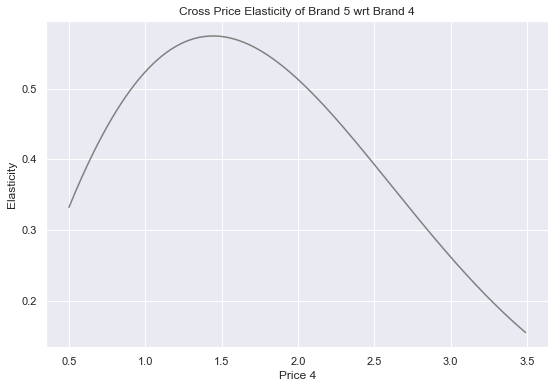

In [69]:
# Examine the cross price elasticity of purchase probability for 
#  brand 5 vs brand 4.

plt.figure(figsize = (9, 6))
plt.plot(price_range, brand5_cross_brand4_price_elasticity, color = 'grey')
plt.xlabel('Price 4')
plt.ylabel('Elasticity')
plt.title('Cross Price Elasticity of Brand 5 wrt Brand 4')

#### Insights:
-  We observe they are positive. As the price of the competitor brand increases, so does the probability for purchasing our own brand.
-  Even though the elasticity starts to decrease from the 1.45 mark, it is still positive, signalling that the increase in purchase probability for the own brand happens more slowly.

## Own and Cross-Price Elasticity by Segment

### $\color{orange}{\text{Well-Off}}$

In [78]:
# Analyze the purchase probability for choosing brand 5 by segments.
# Filter our data
brand_choice_s3 = df_pa[df_pa['Incidence'] == 1]
brand_choice_s3 = brand_choice_s3[brand_choice_s3['Segment'] == 3]
brand_choice_s3

ID  Day  Incidence  Brand  Quantity  Last_Inc_Brand  \
101    200000002    6          1      4         1               0   
115    200000002  100          1      4         2               0   
138    200000002  283          1      4         3               0   
141    200000002  307          1      4         1               0   
153    200000002  422          1      4         1               0   
...          ...  ...        ...    ...       ...             ...   
57346  200000489  687          1      4         1               4   
57347  200000489  693          1      4         2               4   
57348  200000489  701          1      4         3               4   
57350  200000489  715          1      4         2               0   
57351  200000489  722          1      4         1               4   

       Last_Inc_Quantity  Price_1  Price_2  Price_3  ...  Age  Education  \
101                    0     1.59     1.87     2.01  ...   52          2   
115                    0     1.47     1.90     1.95  ...   52          2   
138                    0     1.37     1.89     2.00  ...   52          2   
141                    0     1.34     1.89     2.01  ...   52          2   
153                    0     1.34     1.89     2.02  ...   52          2   
...                  ...      ...      ...      ...  ...  ...        ...   
57346                  1     1.50     1.87     2.06  ...   44          2   
57347                  1     1.42     1.51     2.02  ...   44          2   
57348                  1     1.42     1.85     1.99  ...   44          2   
57350                  0     1.50     1.80     2.09  ...   44          2   
57351                  1     1.51     1.82     2.09  ...   44          2   

       Income  Occupation  Settlement size  Segment  Segment_0  Segment_1  \
101    159052           2                1        3          0          0   
115    159052           2                1        3          0          0   
138    159052           2                1        3          0          0   
141    159052           2                1        3          0          0   
153    159052           2                1        3          0          0   
...       ...         ...              ...      ...        ...        ...   
57346  193816           2                1        3          0          0   
57347  193816           2                1        3          0          0   
57348  193816           2                1        3          0          0   
57350  193816           2                1        3          0          0   
57351  193816           2                1        3          0          0   

       Segment_2  Segment_3  
101            0          1  
115            0          1  
138            0          1  
141            0          1  
153            0          1  
...          ...        ...  
57346          0          1  
57347          0          1  
57348          0          1  
57350          0          1  
57351          0          1  

[3369 rows x 29 columns]

In [79]:
# Brand Choice Model estimation.
Y = brand_choice_s3['Brand']
brand_choice_s3 = pd.get_dummies(brand_choice_s3, columns=['Brand'], prefix = 'Brand', prefix_sep = '_')
X = brand_choice_s3[features] #Price_1 - Price_5
model_brand_choice_s3 = LogisticRegression(solver = 'sag', multi_class = 'multinomial', max_iter = 300)
model_brand_choice_s3.fit(X, Y)

# Coefficients table for segment 3
bc_coef = pd.DataFrame(np.transpose(model_brand_choice_s3.coef_))
bc_coef.columns = [coefficients] #Naming columns
bc_coef.index = [prices] #Naming indices
bc_coef = bc_coef.round(2)
bc_coef

Coef_Brand_1 Coef_Brand_2 Coef_Brand_3 Coef_Brand_4 Coef_Brand_5
Price_1        -2.15         1.33         0.78         0.13        -0.10
Price_2        -0.95        -1.37         1.24         0.79         0.29
Price_3         2.00        -1.67        -0.41        -0.01         0.09
Price_4         2.52         0.95        -0.20        -1.92        -1.34
Price_5        -1.00        -0.30         1.18         0.56        -0.44

### $\color{orange}{\text{Own-Brand Price Elasticity}}$

In [80]:
# Calculating own-brand price elasticity for brand 5 and the Well-off segment.
df_own_brand_5_s3 = pd.DataFrame(index = np.arange(price_range.size))
df_own_brand_5_s3['Price_1'] = brand_choice_s3['Price_1'].mean()
df_own_brand_5_s3['Price_2'] = brand_choice_s3['Price_2'].mean()
df_own_brand_5_s3['Price_3'] = brand_choice_s3['Price_3'].mean()
df_own_brand_5_s3['Price_4'] = brand_choice_s3['Price_4'].mean()
df_own_brand_5_s3['Price_5'] = price_range

predict_own_brand_5_s3 = model_brand_choice_s3.predict_proba(df_own_brand_5_s3)
pr_own_brand_5_s3 = predict_own_brand_5_s3[: ][: , 4]

own_price_elasticity_brand_5_s3 =  beta5 * price_range * (1 - pr_own_brand_5_s3)
df_price_elasticities['Brand 5 S3'] = own_price_elasticity_brand_5_s3

### $\color{orange}{\text{Cross-Brand Price Elasticity}}$

In [81]:
# Calculating cross-brand price elasticity for 
#  brand 5 vs brand 4 for the Well-off segment.
df_brand5_cross_brand4_s3 = pd.DataFrame(index = np.arange(price_range.size))
df_brand5_cross_brand4_s3['Price_1'] = brand_choice_s3['Price_1'].mean()
df_brand5_cross_brand4_s3['Price_2'] = brand_choice_s3['Price_2'].mean()
df_brand5_cross_brand4_s3['Price_3'] = brand_choice_s3['Price_3'].mean()
df_brand5_cross_brand4_s3['Price_4'] = price_range
df_brand5_cross_brand4_s3['Price_5'] = brand_choice_s3['Price_5'].mean()

predict_brand5_cross_brand4_s3 = model_brand_choice_s3.predict_proba(df_brand5_cross_brand4_s3)
pr_cross_brand_5_s3 = predict_brand5_cross_brand4_s3[: ][: , 3]

# Update master data frame to newly obtained elasticity
brand5_cross_brand4_price_elasticity_s3 = -beta5 * price_range * pr_cross_brand_5_s3
df_price_elasticities['Brand_5_Cross_Brand_4_S3'] = brand5_cross_brand4_price_elasticity_s3
pd.options.display.max_rows = None
df_price_elasticities

Price_Point   Mean_PE  PE_Segment_0  PE_Segment_1  PE_Segment_2  \
0           0.50 -0.096436     -0.032318     -0.118478     -0.211213   
1           0.51 -0.100506     -0.034151     -0.122653     -0.217792   
2           0.52 -0.104703     -0.036073     -0.126922     -0.224479   
3           0.53 -0.109030     -0.038089     -0.131286     -0.231275   
4           0.54 -0.113491     -0.040202     -0.135747     -0.238180   
5           0.55 -0.118088     -0.042417     -0.140306     -0.245196   
6           0.56 -0.122825     -0.044737     -0.144965     -0.252323   
7           0.57 -0.127705     -0.047168     -0.149726     -0.259562   
8           0.58 -0.132732     -0.049715     -0.154589     -0.266914   
9           0.59 -0.137910     -0.052382     -0.159556     -0.274380   
10          0.60 -0.143241     -0.055174     -0.164629     -0.281959   
11          0.61 -0.148729     -0.058097     -0.169810     -0.289653   
12          0.62 -0.154378     -0.061157     -0.175099     -0.297462   
13          0.63 -0.160192     -0.064358     -0.180499     -0.305387   
14          0.64 -0.166174     -0.067708     -0.186011     -0.313429   
15          0.65 -0.172327     -0.071212     -0.191637     -0.321588   
16          0.66 -0.178657     -0.074877     -0.197377     -0.329865   
17          0.67 -0.185166     -0.078710     -0.203235     -0.338260   
18          0.68 -0.191859     -0.082716     -0.209210     -0.346773   
19          0.69 -0.198738     -0.086904     -0.215305     -0.355406   
20          0.70 -0.205810     -0.091281     -0.221522     -0.364159   
21          0.71 -0.213076     -0.095855     -0.227861     -0.373031   
22          0.72 -0.220541     -0.100633     -0.234325     -0.382025   
23          0.73 -0.228210     -0.105624     -0.240915     -0.391139   
24          0.74 -0.236086     -0.110836     -0.247632     -0.400375   
25          0.75 -0.244174     -0.116277     -0.254478     -0.409732   
26          0.76 -0.252477     -0.121958     -0.261455     -0.419211   
27          0.77 -0.260999     -0.127887     -0.268563     -0.428813   
28          0.78 -0.269746     -0.134074     -0.275806     -0.438538   
29          0.79 -0.278720     -0.140529     -0.283183     -0.448385   
30          0.80 -0.287927     -0.147262     -0.290697     -0.458355   
31          0.81 -0.297370     -0.154284     -0.298348     -0.468449   
32          0.82 -0.307054     -0.161606     -0.306140     -0.478666   
33          0.83 -0.316982     -0.169238     -0.314072     -0.489007   
34          0.84 -0.327159     -0.177193     -0.322147     -0.499471   
35          0.85 -0.337590     -0.185483     -0.330365     -0.510060   
36          0.86 -0.348278     -0.194119     -0.338729     -0.520772   
37          0.87 -0.359227     -0.203114     -0.347239     -0.531608   
38          0.88 -0.370442     -0.212481     -0.355897     -0.542568   
39          0.89 -0.381927     -0.222233     -0.364705     -0.553652   
40          0.90 -0.393685     -0.232384     -0.373663     -0.564860   
41          0.91 -0.405722     -0.242948     -0.382773     -0.576191   
42          0.92 -0.418041     -0.253939     -0.392037     -0.587646   
43          0.93 -0.430646     -0.265371     -0.401455     -0.599225   
44          0.94 -0.443541     -0.277259     -0.411029     -0.610927   
45          0.95 -0.456729     -0.289620     -0.420760     -0.622753   
46          0.96 -0.470216     -0.302467     -0.430650     -0.634701   
47          0.97 -0.484005     -0.315817     -0.440698     -0.646772   
48          0.98 -0.498098     -0.329686     -0.450908     -0.658965   
49          0.99 -0.512501     -0.344090     -0.461279     -0.671280   
50          1.00 -0.527217     -0.359047     -0.471813     -0.683717   
51          1.01 -0.542249     -0.374573     -0.482510     -0.696276   
52          1.02 -0.557600     -0.390685     -0.493373     -0.708955   
53          1.03 -0.573275     -0.407400     -0.504401     -0.721755   
54          1.04 -0.589276     -0.424737     

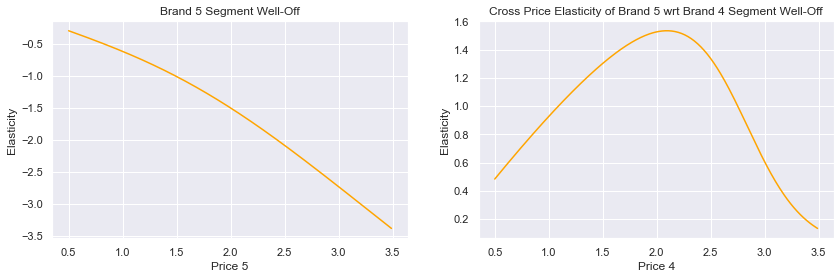

In [82]:
# Using a figure with axes 
#  we plot the own brand and cross-brand price elasticities for 
#  brand 5 cross brand 4 side by side.
fig, axs = plt.subplots(1, 2, figsize = (14, 4))
axs[0].plot(price_range, own_price_elasticity_brand_5_s3, color = 'orange')
axs[0].set_title('Brand 5 Segment Well-Off')
axs[0].set_xlabel('Price 5')

axs[1].plot(price_range, brand5_cross_brand4_price_elasticity_s3, color = 'orange')
axs[1].set_title('Cross Price Elasticity of Brand 5 wrt Brand 4 Segment Well-Off')
axs[1].set_xlabel('Price 4')

for ax in axs.flat:
    ax.set(ylabel = 'Elasticity')

### $\color{blue}{\text{Standard}}$

In [85]:
# Analysing the brand choice probability of the 'Standard' segment.
# Filter our data
brand_choice_s0 = df_pa[df_pa['Incidence'] == 1]
brand_choice_s0 = brand_choice_s0[brand_choice_s0['Segment'] == 0]
brand_choice_s0.head()

ID  Day  Incidence  Brand  Quantity  Last_Inc_Brand  \
6   200000001   28          1      2         2               0   
11  200000001   58          1      5         1               0   
19  200000001  110          1      1         2               0   
24  200000001  142          1      4         1               0   
29  200000001  183          1      2         3               0   

    Last_Inc_Quantity  Price_1  Price_2  Price_3  ...  Age  Education  Income  \
6                   0     1.50     1.90     1.99  ...   47          1  110866   
11                  0     1.39     1.90     1.91  ...   47          1  110866   
19                  0     1.47     1.90     1.99  ...   47          1  110866   
24                  0     1.21     1.35     1.99  ...   47          1  110866   
29                  0     1.46     1.88     1.97  ...   47          1  110866   

    Occupation  Settlement size  Segment  Segment_0  Segment_1  Segment_2  \
6            1                0        0          1          0          0   
11           1                0        0          1          0          0   
19           1                0        0          1          0          0   
24           1                0        0          1          0          0   
29           1                0        0          1          0          0   

    Segment_3  
6           0  
11          0  
19          0  
24          0  
29          0  

[5 rows x 29 columns]

In [86]:
# Brand Choice Model estimation.
Y = brand_choice_s0['Brand']
brand_choice_s0 = pd.get_dummies(brand_choice_s0, columns=['Brand'], prefix = 'Brand', prefix_sep = '_')
X = brand_choice_s0[features]
model_brand_choice_s0 = LogisticRegression(solver = 'sag', multi_class = 'multinomial', max_iter = 200)
model_brand_choice_s0.fit(X, Y)

# Coefficients table segment 0.
bc_coef = pd.DataFrame(np.transpose(model_brand_choice_s0.coef_))
bc_coef.columns = [coefficients]
bc_coef.index = [prices]
bc_coef = bc_coef.round(2)

E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


### $\color{blue}{\text{Own-Brand Price Elasticity}}$

In [87]:
# Calculating own-brand price elasticity for brand 5 and the Standard segment.
df_own_brand_5_s0 = pd.DataFrame(index = np.arange(price_range.size))
df_own_brand_5_s0['Price_1'] = brand_choice_s0['Price_1'].mean()
df_own_brand_5_s0['Price_2'] = brand_choice_s0['Price_2'].mean()
df_own_brand_5_s0['Price_3'] = brand_choice_s0['Price_3'].mean()
df_own_brand_5_s0['Price_4'] = brand_choice_s0['Price_4'].mean()
df_own_brand_5_s0['Price_5'] = price_range

predict_own_brand_5_s0 = model_brand_choice_s0.predict_proba(df_own_brand_5_s0)
pr_own_brand_5_s0 = predict_own_brand_5_s0[: ][: , 4]

# Compute price elasticities and update master data frame
own_price_elasticity_brand_5_s0 =  beta5 * price_range * (1 - pr_own_brand_5_s0)
df_price_elasticities.insert(10, column = 'Brand 5 S0', value = own_price_elasticity_brand_5_s0)

### $\color{blue}{\text{Cross-Brand Price Elasticity}}$

In [88]:
# Calculate cross-brand price elasticity for brand 5 vs brand 4 for the Standard segment.
df_brand5_cross_brand4_s0 = pd.DataFrame(index = np.arange(price_range.size))
df_brand5_cross_brand4_s0['Price_1'] = brand_choice_s0['Price_1'].mean()
df_brand5_cross_brand4_s0['Price_2'] = brand_choice_s0['Price_2'].mean()
df_brand5_cross_brand4_s0['Price_3'] = brand_choice_s0['Price_3'].mean()
df_brand5_cross_brand4_s0['Price_4'] = price_range
df_brand5_cross_brand4_s0['Price_5'] = brand_choice_s0['Price_5'].mean()

predict_brand5_cross_brand4_s0 = model_brand_choice_s0.predict_proba(df_brand5_cross_brand4_s0)
pr_cross_brand_5_s0 = predict_brand5_cross_brand4_s0[: ][: , 3]

# Compute price elasticities and update master data frame.
# Use insert() on position 11, to save the price elasticities in the correct order.
brand5_cross_brand4_price_elasticity_s0 = -beta5 * price_range * pr_cross_brand_5_s0
df_price_elasticities.insert(11, column = 'Brand_5_Cross_Brand_4_S0', value = brand5_cross_brand4_price_elasticity_s0)

### $\color{green}{\text{Career-Focused}}$

In [89]:
# Filter data by the 'Career-focused segment'
brand_choice_s1 = df_pa[df_pa['Incidence'] == 1]
brand_choice_s1 = brand_choice_s1[brand_choice_s1['Segment'] == 1]

In [90]:
# Brand Choice Model estimation.
Y = brand_choice_s1['Brand']
brand_choice_s1 = pd.get_dummies(brand_choice_s1, columns=['Brand'], prefix = 'Brand', prefix_sep = '_')
X = brand_choice_s1[features]
model_brand_choice_s1 = LogisticRegression(solver = 'sag', multi_class = 'multinomial', max_iter = 300)
model_brand_choice_s1.fit(X, Y)

# Coefficients table segment 1
bc_coef = pd.DataFrame(np.transpose(model_brand_choice_s1.coef_))
bc_coef.columns = [coefficients]
bc_coef.index = [prices]
bc_coef = bc_coef.round(2)

### $\color{green}{\text{Own-Brand Price Elasticity}}$

In [91]:
# Calculate own-brand price elasticity for brand 5 and the 'Career-focused' segment.
df_own_brand_5_s1 = pd.DataFrame(index = np.arange(price_range.size))
df_own_brand_5_s1['Price_1'] = brand_choice_s1['Price_1'].mean()
df_own_brand_5_s1['Price_2'] = brand_choice_s1['Price_2'].mean()
df_own_brand_5_s1['Price_3'] = brand_choice_s1['Price_3'].mean()
df_own_brand_5_s1['Price_4'] = brand_choice_s1['Price_4'].mean()
df_own_brand_5_s1['Price_5'] = price_range

predict_own_brand_5_s1 = model_brand_choice_s1.predict_proba(df_own_brand_5_s1)
pr_own_brand_5_s1 = predict_own_brand_5_s1[: ][: , 4]

# Compute price elasticities and update data frame
own_price_elasticity_brand_5_s1 =  beta5 * price_range * (1 - pr_own_brand_5_s1)
df_price_elasticities.insert(12, column = 'Brand 5 S1', value = own_price_elasticity_brand_5_s1)

### $\color{green}{\text{Cross-Brand Price Elasticity}}$

In [92]:
# Calculate cross-brand price elasticity for brand 5 vs brand 4 for the Career-focused segment.
df_brand5_cross_brand4_s1 = pd.DataFrame(index = np.arange(price_range.size))
df_brand5_cross_brand4_s1 = pd.DataFrame(index = np.arange(price_range.size))
df_brand5_cross_brand4_s1['Price_1'] = brand_choice_s1['Price_1'].mean()
df_brand5_cross_brand4_s1['Price_2'] = brand_choice_s1['Price_2'].mean()
df_brand5_cross_brand4_s1['Price_3'] = brand_choice_s1['Price_3'].mean()
df_brand5_cross_brand4_s1['Price_4'] = price_range
df_brand5_cross_brand4_s1['Price_5'] = brand_choice_s1['Price_5'].mean()

predict_brand5_cross_brand4_s1 = model_brand_choice_s1.predict_proba(df_brand5_cross_brand4_s1)
pr_cross_brand_5_s1 = predict_brand5_cross_brand4_s1[: ][: , 3]

brand5_cross_brand4_price_elasticity_s1 = -beta5 * price_range * pr_cross_brand_5_s1
df_price_elasticities.insert(13, column = 'Brand_5_Cross_Brand_4_S1', 
                             value = brand5_cross_brand4_price_elasticity_s1)

### $\color{red}{\text{Fewer-Opportunities}}$

In [93]:
# Filter data
brand_choice_s2 = df_pa[df_pa['Incidence'] == 1]
brand_choice_s2 = brand_choice_s2[brand_choice_s2['Segment'] == 2]

In [94]:
# Brand Choice Model estimation.
Y = brand_choice_s2['Brand']
brand_choice_s2 = pd.get_dummies(brand_choice_s2, columns=['Brand'], prefix = 'Brand', prefix_sep = '_')
X = brand_choice_s2[features]
model_brand_choice_s2 = LogisticRegression(solver = 'sag', multi_class = 'multinomial', max_iter = 300)
model_brand_choice_s2.fit(X, Y)

# Coefficients table segment 2
bc_coef = pd.DataFrame(np.transpose(model_brand_choice_s2.coef_))
bc_coef.columns = [coefficients]
bc_coef.index = [prices]
bc_coef = bc_coef.round(2)

### $\color{red}{\text{Own-Brand Price Elasticity}}$

In [95]:
# Calculate own-brand price elasticity for brand 5 and the 'Fewer-opportunities' segment.
df_own_brand_5_s2 = pd.DataFrame(index = np.arange(price_range.size))
df_own_brand_5_s2['Price_1'] = brand_choice_s2['Price_1'].mean()
df_own_brand_5_s2['Price_2'] = brand_choice_s2['Price_2'].mean()
df_own_brand_5_s2['Price_3'] = brand_choice_s2['Price_3'].mean()
df_own_brand_5_s2['Price_4'] = brand_choice_s2['Price_4'].mean()
df_own_brand_5_s2['Price_5'] = price_range

predict_own_brand_5_s2 = model_brand_choice_s2.predict_proba(df_own_brand_5_s2)
pr_own_brand_5_s2 = predict_own_brand_5_s2[: ][: , 4]

#compute price elasticities and update data frame
own_price_elasticity_brand_5_s2 =  beta5 * price_range * (1 - pr_own_brand_5_s2)
df_price_elasticities.insert(14, column = 'Brand 5 S2', value = own_price_elasticity_brand_5_s2)

### $\color{red}{\text{Cross-Brand Price Elasticity}}$

In [96]:
# Calculate cross-brand price elasticity for brand 5 vs brand 4 for the Fewer-opportunities segment.
df_brand5_cross_brand4_s2 = pd.DataFrame(index = np.arange(price_range.size))
df_brand5_cross_brand4_s2['Price_1'] = brand_choice_s2['Price_1'].mean()
df_brand5_cross_brand4_s2['Price_2'] = brand_choice_s2['Price_2'].mean()
df_brand5_cross_brand4_s2['Price_3'] = brand_choice_s2['Price_3'].mean()
df_brand5_cross_brand4_s2['Price_4'] = price_range
df_brand5_cross_brand4_s2['Price_5'] = brand_choice_s2['Price_5'].mean()

predict_brand5_cross_brand4_s2 = model_brand_choice_s2.predict_proba(df_brand5_cross_brand4_s2)
pr_cross_brand_5_s2 = predict_brand5_cross_brand4_s2[: ][: , 3]

brand5_cross_brand4_price_elasticity_s2 = -beta5 * price_range * pr_cross_brand_5_s2
df_price_elasticities.insert(15, column = 'Brand_5_Cross_Brand_4_S2', value = brand5_cross_brand4_price_elasticity_s2)
df_price_elasticities

Price_Point   Mean_PE  PE_Segment_0  PE_Segment_1  PE_Segment_2  \
0           0.50 -0.096436     -0.032318     -0.118478     -0.211213   
1           0.51 -0.100506     -0.034151     -0.122653     -0.217792   
2           0.52 -0.104703     -0.036073     -0.126922     -0.224479   
3           0.53 -0.109030     -0.038089     -0.131286     -0.231275   
4           0.54 -0.113491     -0.040202     -0.135747     -0.238180   
5           0.55 -0.118088     -0.042417     -0.140306     -0.245196   
6           0.56 -0.122825     -0.044737     -0.144965     -0.252323   
7           0.57 -0.127705     -0.047168     -0.149726     -0.259562   
8           0.58 -0.132732     -0.049715     -0.154589     -0.266914   
9           0.59 -0.137910     -0.052382     -0.159556     -0.274380   
10          0.60 -0.143241     -0.055174     -0.164629     -0.281959   
11          0.61 -0.148729     -0.058097     -0.169810     -0.289653   
12          0.62 -0.154378     -0.061157     -0.175099     -0.297462   
13          0.63 -0.160192     -0.064358     -0.180499     -0.305387   
14          0.64 -0.166174     -0.067708     -0.186011     -0.313429   
15          0.65 -0.172327     -0.071212     -0.191637     -0.321588   
16          0.66 -0.178657     -0.074877     -0.197377     -0.329865   
17          0.67 -0.185166     -0.078710     -0.203235     -0.338260   
18          0.68 -0.191859     -0.082716     -0.209210     -0.346773   
19          0.69 -0.198738     -0.086904     -0.215305     -0.355406   
20          0.70 -0.205810     -0.091281     -0.221522     -0.364159   
21          0.71 -0.213076     -0.095855     -0.227861     -0.373031   
22          0.72 -0.220541     -0.100633     -0.234325     -0.382025   
23          0.73 -0.228210     -0.105624     -0.240915     -0.391139   
24          0.74 -0.236086     -0.110836     -0.247632     -0.400375   
25          0.75 -0.244174     -0.116277     -0.254478     -0.409732   
26          0.76 -0.252477     -0.121958     -0.261455     -0.419211   
27          0.77 -0.260999     -0.127887     -0.268563     -0.428813   
28          0.78 -0.269746     -0.134074     -0.275806     -0.438538   
29          0.79 -0.278720     -0.140529     -0.283183     -0.448385   
30          0.80 -0.287927     -0.147262     -0.290697     -0.458355   
31          0.81 -0.297370     -0.154284     -0.298348     -0.468449   
32          0.82 -0.307054     -0.161606     -0.306140     -0.478666   
33          0.83 -0.316982     -0.169238     -0.314072     -0.489007   
34          0.84 -0.327159     -0.177193     -0.322147     -0.499471   
35          0.85 -0.337590     -0.185483     -0.330365     -0.510060   
36          0.86 -0.348278     -0.194119     -0.338729     -0.520772   
37          0.87 -0.359227     -0.203114     -0.347239     -0.531608   
38          0.88 -0.370442     -0.212481     -0.355897     -0.542568   
39          0.89 -0.381927     -0.222233     -0.364705     -0.553652   
40          0.90 -0.393685     -0.232384     -0.373663     -0.564860   
41          0.91 -0.405722     -0.242948     -0.382773     -0.576191   
42          0.92 -0.418041     -0.253939     -0.392037     -0.587646   
43          0.93 -0.430646     -0.265371     -0.401455     -0.599225   
44          0.94 -0.443541     -0.277259     -0.411029     -0.610927   
45          0.95 -0.456729     -0.289620     -0.420760     -0.622753   
46          0.96 -0.470216     -0.302467     -0.430650     -0.634701   
47          0.97 -0.484005     -0.315817     -0.440698     -0.646772   
48          0.98 -0.498098     -0.329686     -0.450908     -0.658965   
49          0.99 -0.512501     -0.344090     -0.461279     -0.671280   
50          1.00 -0.527217     -0.359047     -0.471813     -0.683717   
51          1.01 -0.542249     -0.374573     -0.482510     -0.696276   
52          1.02 -0.557600     -0.390685     -0.493373     -0.708955   
53          1.03 -0.573275     -0.407400     -0.504401     -0.721755   
54          1.04 -0.589276     -0.424737     

Text(0.5, 0, 'Price 4')

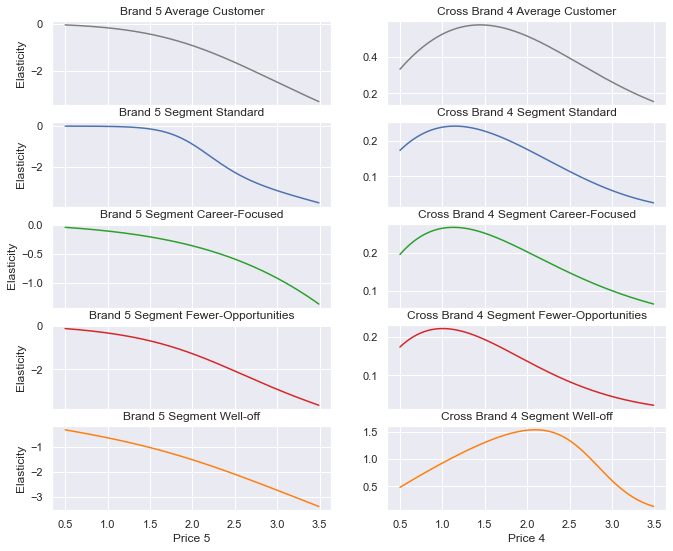

In [97]:
# Plot the own and cross brand price elasticities for 
#  the average customer and each of the four segments.

fig1, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, 2, figsize = (11, 9), sharex = True)
ax1[0].plot(price_range, own_price_elasticity_brand_5, 'tab:grey')
ax1[0].set_title('Brand 5 Average Customer')
ax1[0].set_ylabel('Elasticity')
ax1[1].plot(price_range, brand5_cross_brand4_price_elasticity, 'tab:grey')
ax1[1].set_title('Cross Brand 4 Average Customer')


ax2[0].plot(price_range, own_price_elasticity_brand_5_s0)
ax2[0].set_title('Brand 5 Segment Standard')
ax2[0].set_ylabel('Elasticity')
ax2[1].plot(price_range, brand5_cross_brand4_price_elasticity_s0)
ax2[1].set_title('Cross Brand 4 Segment Standard')

ax3[0].plot(price_range, own_price_elasticity_brand_5_s1, 'tab:green')
ax3[0].set_title('Brand 5 Segment Career-Focused')
ax3[0].set_ylabel('Elasticity')
ax3[1].plot(price_range, brand5_cross_brand4_price_elasticity_s1, 'tab:green')
ax3[1].set_title('Cross Brand 4 Segment Career-Focused')

ax4[0].plot(price_range, own_price_elasticity_brand_5_s2, 'tab:red')
ax4[0].set_title('Brand 5 Segment Fewer-Opportunities')
ax4[0].set_ylabel('Elasticity')
ax4[1].plot(price_range, brand5_cross_brand4_price_elasticity_s2, 'tab:red')
ax4[1].set_title('Cross Brand 4 Segment Fewer-Opportunities')

ax5[0].plot(price_range, own_price_elasticity_brand_5_s3, 'tab:orange')
ax5[0].set_title('Brand 5 Segment Well-off')
ax5[0].set_xlabel('Price 5')
ax5[0].set_ylabel('Elasticity')
ax5[1].plot(price_range, brand5_cross_brand4_price_elasticity_s3, 'tab:orange')
ax5[1].set_title('Cross Brand 4 Segment Well-off')
ax5[1].set_xlabel('Price 4')

#### Insights:
We can observe differences and similiraties between the segments and examine their preference, when it comes to brand choice.<br>
The two segments, which seem to be of most interested for the marketing team of brand 5, seem to be the 'Career-focused' and the 'Well-off'. They are also the segments which purchase this brand most often. 
-  The Career-focused segment is the most inelastic and they are the most loyal segment. 
    -  Based on our model, they do not seem to be that affected by price, therefore brand 5 could increase its price, without fear of significant loss of customers from this segment. 
-  The Well-off segment on the other hand, seems to be more elastic. They also purchase the competitor brand 4 most often.
    -  In order to target this segment, our analysis signals, that price needs to be decreased. However, keep in mind that other factors aside from price might be influencing the purchase behaivour of this segment.

## Price Elasticity of Purchase Quantity

In [98]:
# To determine price elasticity of purchase quantity, 
#   also known as price elasticity of demand.
# Interested in purchase ocassion, where the purchased quantity is different from 0.
# Filter our data
df_purchase_quantity = df_pa[df_pa['Incidence'] == 1]
df_purchase_quantity.head()

ID  Day  Incidence  Brand  Quantity  Last_Inc_Brand  \
6   200000001   28          1      2         2               0   
11  200000001   58          1      5         1               0   
19  200000001  110          1      1         2               0   
24  200000001  142          1      4         1               0   
29  200000001  183          1      2         3               0   

    Last_Inc_Quantity  Price_1  Price_2  Price_3  ...  Age  Education  Income  \
6                   0     1.50     1.90     1.99  ...   47          1  110866   
11                  0     1.39     1.90     1.91  ...   47          1  110866   
19                  0     1.47     1.90     1.99  ...   47          1  110866   
24                  0     1.21     1.35     1.99  ...   47          1  110866   
29                  0     1.46     1.88     1.97  ...   47          1  110866   

    Occupation  Settlement size  Segment  Segment_0  Segment_1  Segment_2  \
6            1                0        0          1          0          0   
11           1                0        0          1          0          0   
19           1                0        0          1          0          0   
24           1                0        0          1          0          0   
29           1                0        0          1          0          0   

    Segment_3  
6           0  
11          0  
19          0  
24          0  
29          0  

[5 rows x 29 columns]

In [99]:
# Create brand dummies, for each of the five brands.
df_purchase_quantity = pd.get_dummies(df_purchase_quantity, 
                                      columns = ['Brand'], 
                                      prefix = 'Brand', prefix_sep = '_')
# Descriptive analysis: 
#  - quantity ranges from 1 to 15 
#  - average value of 2.8, 
#    which means that more often than not our customers buy more than 1 chocolate candy bar.
df_purchase_quantity.describe()

ID           Day  Incidence      Quantity  Last_Inc_Brand  \
count  1.463800e+04  14638.000000    14638.0  14638.000000    14638.000000   
mean   2.000003e+08    359.607597        1.0      2.774559        1.535251   
std    1.423786e+02    205.346253        0.0      1.796736        2.060858   
min    2.000000e+08      1.000000        1.0      1.000000        0.000000   
25%    2.000001e+08    175.000000        1.0      2.000000        0.000000   
50%    2.000003e+08    355.000000        1.0      2.000000        0.000000   
75%    2.000004e+08    532.000000        1.0      3.000000        4.000000   
max    2.000005e+08    727.000000        1.0     15.000000        5.000000   

       Last_Inc_Quantity       Price_1       Price_2       Price_3  \
count       14638.000000  14638.000000  14638.000000  14638.000000   
mean            0.406955      1.384559      1.764717      2.006694   
std             0.491283      0.090944      0.181667      0.046200   
min             0.000000      1.100000      1.260000      1.870000   
25%             0.000000      1.340000      1.570000      1.970000   
50%             0.000000      1.390000      1.880000      2.010000   
75%             1.000000      1.470000      1.890000      2.060000   
max             1.000000      1.590000      1.900000      2.140000   

            Price_4  ...       Segment     Segment_0     Segment_1  \
count  14638.000000  ...  14638.000000  14638.000000  14638.000000   
mean       2.159658  ...      1.341235      0.294303      0.300314   
std        0.093253  ...      1.128625      0.455744      0.458410   
min        1.760000  ...      0.000000      0.000000      0.000000   
25%        2.120000  ...      0.000000      0.000000      0.000000   
50%        2.180000  ...      1.000000      0.000000      0.000000   
75%        2.240000  ...      2.000000      1.000000      1.000000   
max        2.260000  ...      3.000000      1.000000      1.000000   

          Segment_2     Segment_3       Brand_1       Brand_2       Brand_3  \
count  14638.000000  14638.000000  14638.000000  14638.000000  14638.000000   
mean       0.175229      0.230154      0.092226      0.310288      0.057453   
std        0.380176      0.420946      0.289354      0.462627      0.232714   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      1.000000      0.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

            Brand_4       Brand_5  
count  14638.000000  14638.000000  
mean       0.199959      0.340074  
std        0.399983      0.473750  
min        0.000000      0.000000  
25%        0.000000      0.000000  
50%        0.000000      0.000000  
75%        0.000000      1.000000  
max        1.000000      1.000000  

[8 rows x 33 columns]

In [100]:
# Decide on which features to include in our model -> Price & Promotion
df_purchase_quantity.columns.values

array(['ID', 'Day', 'Incidence', 'Quantity', 'Last_Inc_Brand',
       'Last_Inc_Quantity', 'Price_1', 'Price_2', 'Price_3', 'Price_4',
       'Price_5', 'Promotion_1', 'Promotion_2', 'Promotion_3',
       'Promotion_4', 'Promotion_5', 'Sex', 'Marital status', 'Age',
       'Education', 'Income', 'Occupation', 'Settlement size', 'Segment',
       'Segment_0', 'Segment_1', 'Segment_2', 'Segment_3', 'Brand_1',
       'Brand_2', 'Brand_3', 'Brand_4', 'Brand_5'], dtype=object)

In [103]:
#Find the price of the product that is chosen at this incidence
df_purchase_quantity['Price_Incidence'] = \
(df_purchase_quantity['Brand_1'] * df_purchase_quantity['Price_1'] +
 df_purchase_quantity['Brand_2'] * df_purchase_quantity['Price_2'] +
 df_purchase_quantity['Brand_3'] * df_purchase_quantity['Price_3'] +
 df_purchase_quantity['Brand_4'] * df_purchase_quantity['Price_4'] +
 df_purchase_quantity['Brand_5'] * df_purchase_quantity['Price_5'] )

In [104]:
#Find the whether a promotion was run at this incidence
df_purchase_quantity['Promotion_Incidence'] = \
(df_purchase_quantity['Brand_1'] * df_purchase_quantity['Promotion_1'] +
 df_purchase_quantity['Brand_2'] * df_purchase_quantity['Promotion_2'] +
 df_purchase_quantity['Brand_3'] * df_purchase_quantity['Promotion_3'] +
 df_purchase_quantity['Brand_4'] * df_purchase_quantity['Promotion_4'] +
 df_purchase_quantity['Brand_5'] * df_purchase_quantity['Promotion_5'] )

In [105]:
df_purchase_quantity.head()

ID  Day  Incidence  Quantity  Last_Inc_Brand  Last_Inc_Quantity  \
6   200000001   28          1         2               0                  0   
11  200000001   58          1         1               0                  0   
19  200000001  110          1         2               0                  0   
24  200000001  142          1         1               0                  0   
29  200000001  183          1         3               0                  0   

    Price_1  Price_2  Price_3  Price_4  ...  Segment_1  Segment_2  Segment_3  \
6      1.50     1.90     1.99     2.09  ...          0          0          0   
11     1.39     1.90     1.91     2.12  ...          0          0          0   
19     1.47     1.90     1.99     1.97  ...          0          0          0   
24     1.21     1.35     1.99     2.16  ...          0          0          0   
29     1.46     1.88     1.97     1.89  ...          0          0          0   

    Brand_1  Brand_2  Brand_3  Brand_4  Brand_5  Price_Incidence  \
6         0        1        0        0        0             1.90   
11        0        0        0        0        1             2.62   
19        1        0        0        0        0             1.47   
24        0        0        0        1        0             2.16   
29        0        1        0        0        0             1.88   

    Promotion_Incidence  
6                     0  
11                    1  
19                    0  
24                    0  
29                    0  

[5 rows x 35 columns]

In [106]:
pd.options.display.max_rows = 100

## Model Estimation: Linear Regression

In [107]:
X = df_purchase_quantity[['Price_Incidence', 'Promotion_Incidence']]
X

Price_Incidence  Promotion_Incidence
6                 1.90                    0
11                2.62                    1
19                1.47                    0
24                2.16                    0
29                1.88                    0
...                ...                  ...
58621             1.89                    0
58648             1.35                    1
58674             1.85                    1
58687             1.51                    0
58691             1.82                    0

[14638 rows x 2 columns]

In [108]:
Y = df_purchase_quantity['Quantity']
Y.head()

6     2
11    1
19    2
24    1
29    3
Name: Quantity, dtype: int64

In [109]:
# Linear Regression Model
model_quantity = LinearRegression()
model_quantity.fit(X, Y)

LinearRegression()

In [110]:
# It appears that promotion reflects negatively on the 
#  purchase quantity of the average client, which is unexpected.
model_quantity.coef_

array([-0.8173651 , -0.10504673])

## Price Elasticity with Promotion

In [111]:
# Examine the price elasticity of purchase quantity 
#  with active promotional activities for each price point.
df_price_elasticity_quantity = pd.DataFrame(index = np.arange(price_range.size))
df_price_elasticity_quantity['Price_Incidence'] = price_range
df_price_elasticity_quantity['Promotion_Incidence'] = 1

In [112]:
df_price_elasticity_quantity

Price_Incidence  Promotion_Incidence
0               0.50                    1
1               0.51                    1
2               0.52                    1
3               0.53                    1
4               0.54                    1
..               ...                  ...
295             3.45                    1
296             3.46                    1
297             3.47                    1
298             3.48                    1
299             3.49                    1

[300 rows x 2 columns]

In [113]:
#Take the coefficient for price.
beta_quantity = model_quantity.coef_[0]
beta_quantity

-0.8173651016684998

In [115]:
predict_quantity = model_quantity.predict(df_price_elasticity_quantity)

In [116]:
# Calculate the price elasticity with new formula. 
price_elasticity_quantity_promotion_yes = \
beta_quantity * price_range / predict_quantity

In [117]:
df_price_elasticities['PE_Quantity_Promotion_1'] = \
price_elasticity_quantity_promotion_yes
df_price_elasticities

Price_Point   Mean_PE  PE_Segment_0  PE_Segment_1  PE_Segment_2  \
0           0.50 -0.096436     -0.032318     -0.118478     -0.211213   
1           0.51 -0.100506     -0.034151     -0.122653     -0.217792   
2           0.52 -0.104703     -0.036073     -0.126922     -0.224479   
3           0.53 -0.109030     -0.038089     -0.131286     -0.231275   
4           0.54 -0.113491     -0.040202     -0.135747     -0.238180   
..           ...       ...           ...           ...           ...   
295         3.45 -8.013757    -12.414354     -5.717139     -5.064079   
296         3.46 -8.039007    -12.450920     -5.737387     -5.080966   
297         3.47 -8.064224    -12.487470     -5.757598     -5.097834   
298         3.48 -8.089406    -12.524002     -5.777772     -5.114684   
299         3.49 -8.114555    -12.560519     -5.797910     -5.131515   

     PE_Segment_3  Elasticity_Promotion_1  Elasticity_Promotion_0   Brand_5  \
0       -0.179446               -0.125736               -0.195642 -0.049055   
1       -0.185035               -0.129852               -0.201763 -0.050616   
2       -0.190716               -0.134047               -0.207986 -0.052207   
3       -0.196490               -0.138322               -0.214313 -0.053827   
4       -0.202356               -0.142678               -0.220744 -0.055477   
..            ...                     ...                     ...       ...   
295     -4.302414               -4.861040               -4.982668 -3.231572   
296     -4.316761               -4.879240               -4.999573 -3.247766   
297     -4.331092               -4.897410               -5.016458 -3.263927   
298     -4.345408               -4.915550               -5.033323 -3.280057   
299     -4.359707               -4.933659               -5.050168 -3.296153   

     Brand_5_Cross_Brand_4  Brand 5 S0  Brand_5_Cross_Brand_4_S0  Brand 5 S1  \
0                 0.332011   -0.001042                  0.172748   -0.039242   
1                 0.337288   -0.001104                  0.175017   -0.040244   
2                 0.342507   -0.001170                  0.177243   -0.041256   
3                 0.347669   -0.001238                  0.179425   -0.042277   
4                 0.352773   -0.001311                  0.181564   -0.043308   
..                     ...         ...                       ...         ...   
295               0.162235   -3.746045                  0.028576   -1.319098   
296               0.160335   -3.757486                  0.028046   -1.329302   
297               0.158449   -3.768908                  0.027524   -1.339562   
298               0.156577   -3.780310                  0.027009   -1.349879   
299               0.154720   -3.791694                  0.026501   -1.360251   

     Brand_5_Cross_Brand_4_S1  Brand 5 S2  Brand_5_Cross_Brand_4_S2  \
0                    0.196463   -0.115834                  0.174115   
1                    0.198958   -0.118873                  0.176171   
2                    0.201402   -0.121947                  0.178175   
3                    0.203794   -0.125056                  0.180129   
4                    0.206134   -0.128201                  0.182032   
..                        ...         ...                       ...   
295                  0.068694   -3.592454                  0.024055   
296                  0.068080   -3.606359                  0.023699   
297                  0.067470   -3.620219                  0.023347   
298                  0.066865   -3.634035                  0.023000   
299                  0.066264   -3.647808                  0.022657   

     Brand 5 S3  Brand_5_Cross_Brand_4_S3  PE_Quantity_Promotion_1  
0     -0.298413                  0.482873                -0.102157  
1     -0.304471                  0.492184                -0.104413  
2     -0.310539                  0.501481                -0.106679  
3     -0.316618                  0.510761                -0.108954  
4     -0.322707                 

Text(0.5, 1.0, 'Price Elasticity of Purchase Quantity with Promotion')

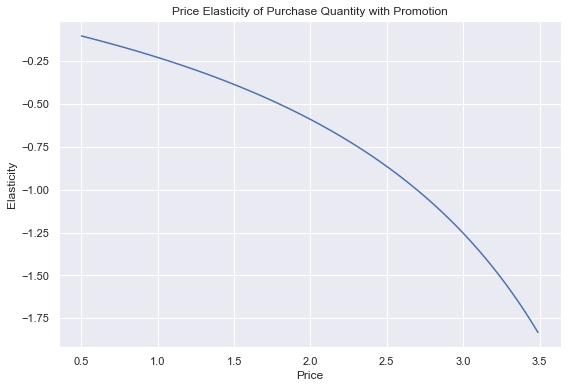

In [118]:
plt.figure(figsize = (9, 6))
plt.plot(price_range, price_elasticity_quantity_promotion_yes)
plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.title('Price Elasticity of Purchase Quantity with Promotion')

## Price Elasticity without Promotion

In [119]:
# Overwrite promotion incidence in order to use the same df. 
# A ssume there are no promotinal activities active for the entire price range.
df_price_elasticity_quantity['Promotion_Incidence'] = 0
# Find the new predicted quantities.
predict_quantity = model_quantity.predict(df_price_elasticity_quantity)
# Calculate the new price elasticities.
price_elasticity_quantity_promotion_no = beta_quantity * price_range / predict_quantity
# Add the results to the master data frame.
df_price_elasticities['PE_Quantity_Promotion_0'] = price_elasticity_quantity_promotion_no
df_price_elasticities

Price_Point   Mean_PE  PE_Segment_0  PE_Segment_1  PE_Segment_2  \
0           0.50 -0.096436     -0.032318     -0.118478     -0.211213   
1           0.51 -0.100506     -0.034151     -0.122653     -0.217792   
2           0.52 -0.104703     -0.036073     -0.126922     -0.224479   
3           0.53 -0.109030     -0.038089     -0.131286     -0.231275   
4           0.54 -0.113491     -0.040202     -0.135747     -0.238180   
..           ...       ...           ...           ...           ...   
295         3.45 -8.013757    -12.414354     -5.717139     -5.064079   
296         3.46 -8.039007    -12.450920     -5.737387     -5.080966   
297         3.47 -8.064224    -12.487470     -5.757598     -5.097834   
298         3.48 -8.089406    -12.524002     -5.777772     -5.114684   
299         3.49 -8.114555    -12.560519     -5.797910     -5.131515   

     PE_Segment_3  Elasticity_Promotion_1  Elasticity_Promotion_0   Brand_5  \
0       -0.179446               -0.125736               -0.195642 -0.049055   
1       -0.185035               -0.129852               -0.201763 -0.050616   
2       -0.190716               -0.134047               -0.207986 -0.052207   
3       -0.196490               -0.138322               -0.214313 -0.053827   
4       -0.202356               -0.142678               -0.220744 -0.055477   
..            ...                     ...                     ...       ...   
295     -4.302414               -4.861040               -4.982668 -3.231572   
296     -4.316761               -4.879240               -4.999573 -3.247766   
297     -4.331092               -4.897410               -5.016458 -3.263927   
298     -4.345408               -4.915550               -5.033323 -3.280057   
299     -4.359707               -4.933659               -5.050168 -3.296153   

     Brand_5_Cross_Brand_4  Brand 5 S0  Brand_5_Cross_Brand_4_S0  Brand 5 S1  \
0                 0.332011   -0.001042                  0.172748   -0.039242   
1                 0.337288   -0.001104                  0.175017   -0.040244   
2                 0.342507   -0.001170                  0.177243   -0.041256   
3                 0.347669   -0.001238                  0.179425   -0.042277   
4                 0.352773   -0.001311                  0.181564   -0.043308   
..                     ...         ...                       ...         ...   
295               0.162235   -3.746045                  0.028576   -1.319098   
296               0.160335   -3.757486                  0.028046   -1.329302   
297               0.158449   -3.768908                  0.027524   -1.339562   
298               0.156577   -3.780310                  0.027009   -1.349879   
299               0.154720   -3.791694                  0.026501   -1.360251   

     Brand_5_Cross_Brand_4_S1  Brand 5 S2  Brand_5_Cross_Brand_4_S2  \
0                    0.196463   -0.115834                  0.174115   
1                    0.198958   -0.118873                  0.176171   
2                    0.201402   -0.121947                  0.178175   
3                    0.203794   -0.125056                  0.180129   
4                    0.206134   -0.128201                  0.182032   
..                        ...         ...                       ...   
295                  0.068694   -3.592454                  0.024055   
296                  0.068080   -3.606359                  0.023699   
297                  0.067470   -3.620219                  0.023347   
298                  0.066865   -3.634035                  0.023000   
299                  0.066264   -3.647808                  0.022657   

     Brand 5 S3  Brand_5_Cross_Brand_4_S3  PE_Quantity_Promotion_1  \
0     -0.298413                  0.482873                -0.102157   
1     -0.304471                  0.492184                -0.104413   
2     -0.310539                  0.501481                -0.106679   
3     -0.316618                  0.510761                -0.108954   
4     -0.322707            

Text(0.5, 1.0, 'Price Elasticity of Purchase Quantity with Promotion')

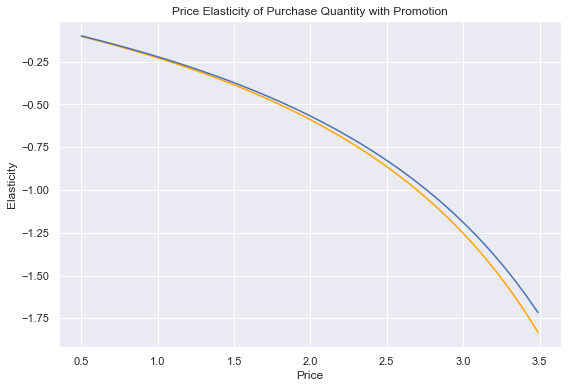

In [120]:
# Plot the two elasticities side by side. 
plt.figure(figsize = (9, 6))
plt.plot(price_range, price_elasticity_quantity_promotion_yes, color = 'orange')
plt.plot(price_range, price_elasticity_quantity_promotion_no)
plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.title('Price Elasticity of Purchase Quantity with Promotion')

#### Insights:
- We observe that the two elasticities are very close together for almost the entire price range.
- It appears that promotion does not appear to be a significant factor in the customers' decission what quantity of chocolate candy bars to purchase.